In [142]:
# Import our dependencies
import pandas as pd
import os
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [143]:
#read the inpout file
#input_file = '/Users/nkulkar/Desktop/LearnPython/project/ClassProject/subset_data.csv'
input_file ='/Users/nkulkar/AnacondaProjects/GSSData_2006to2016.xlsx'

file_check =  Path(input_file)
file_exists = file_check.exists()
print(file_exists)

True


In [144]:
#GSS_df = pd.read_excel(input_file, encoding = "ISO-8859-1")
GSS_df = pd.read_excel(input_file, encoding = "ISO-8859-1")

GSS_df.head()

print(list(GSS_df))

# get the data size 
#data_set_size = file_one_df.shape
#print(data_set_size)

#get all column names to create the next data sets
#file_one_df.columns.values

['Ballot used for interview', 'Specific denomination', 'Rs religious preference', 'Should marijuana be made legal', 'Courts dealing with criminals', 'Importance of gun control issue to r', 'Caring for the poor -- version z', 'Halting rising crime rate', 'Think of self as liberal or conservative', 'Vote obama or mccain', 'Religion in which raised', 'General happiness', 'Opinion of family income', 'Satisfaction with financial situation', 'Job or housework', 'Is r likely to lose job', 'To be well liked or popular', 'Confidence in press', 'Confidence in education', 'Condition of health', 'Happiness of marriage', 'Political party affiliation', 'Respondents income', 'Total family income', 'Fathers census occupation code (2010)', 'Ever been divorced or separated', 'Age when first married', 'Marital status', 'Rs industry code   (1980)', 'Travel time to work', 'R self-emp or works for somebody', 'Labor force status', 'Respondent id number', 'Number of brothers and sisters', 'Age of respondent',

In [162]:
## Select the columns you want to analyze
df_happytimes= GSS_df.filter(['Gss year for this respondent                       ',
                              'Labor force status',
                          'Marital status','Total family income',
                         'General happiness','Happiness of marriage'],axis=1)
df_happytimes.head()

,Gss year for this respondent,Labor force status,Marital status,Total family income,General happiness,Happiness of marriage
0,2006,Working fulltime,Never married,$25000 or more,Pretty happy,Not applicable
1,2006,Working fulltime,Never married,$25000 or more,Very happy,Not applicable
2,2006,Retired,Divorced,Refused,Pretty happy,Not applicable
3,2006,Working parttime,Never married,$25000 or more,Very happy,Not applicable
4,2006,School,Never married,Don't know,Pretty happy,Not applicable


Happiness 
1. Happiness ( Summarized Data) 1972 - 2016
2. Happiness vs Satisfaction financial 
3. Happiness vs Marital Status 
4. Happiness vs Labor Force Status 
5. Happiness vs Condition of health 
6. Happiness vs Social Issues (Marijuana , Political Affliation, Gun Issues)

In [163]:
#lets rename the columns
df_happytimes = df_happytimes.rename(columns={'Gss year for this respondent                       ': 'Year', 
                                            'Marital status' : 'Marital_status',
                                            'General happiness' :'General_happiness',
                                            'Labor force status' : 'Labor_force',
                                              'Happiness of marriage' : 'Happiness_of_marriage',
                                             'Total family income' :'Family_income'})


df_happytimes.head()

,Year,Labor_force,Marital_status,Family_income,General_happiness,Happiness_of_marriage
0,2006,Working fulltime,Never married,$25000 or more,Pretty happy,Not applicable
1,2006,Working fulltime,Never married,$25000 or more,Very happy,Not applicable
2,2006,Retired,Divorced,Refused,Pretty happy,Not applicable
3,2006,Working parttime,Never married,$25000 or more,Very happy,Not applicable
4,2006,School,Never married,Don't know,Pretty happy,Not applicable


In [164]:
df_labor_force = df_happytimes.filter(['Year','Labor_force','Family_income'],axis=1)
df_labor_force.head()

,Year,Labor_force,Family_income
0,2006,Working fulltime,$25000 or more
1,2006,Working fulltime,$25000 or more
2,2006,Retired,Refused
3,2006,Working parttime,$25000 or more
4,2006,School,Don't know


In [165]:
df_labor_force =df_labor_force.groupby(['Labor_force','Year'],as_index=False).size().unstack(fill_value=0)
df_labor_force.head()

Year,2006,2008,2010,2012,2014,2016
Labor_force,,,,,,
0,2,0,0,0,1,0
Keeping house,496,227,235,210,263,284
No answer,2,2,3,1,1,3
Other,155,60,65,54,76,89
Retired,715,336,319,357,460,574


In [166]:
df_labor_force = df_labor_force.drop(df_labor_force.index[[0]])
df_labor_force

x= list(df_labor_force)
print(x)

[2006, 2008, 2010, 2012, 2014, 2016]


In [167]:
df_marital_status =df_happytimes.groupby(['Marital_status','Year'],as_index=False).size().unstack(fill_value=0)
df_marital_status

Year,2006,2008,2010,2012,2014,2016
Marital_status,,,,,,
0,3,2,0,0,2,0
Divorced,732,281,341,317,411,495
Married,2170,972,891,900,1158,1212
Never married,1080,531,565,526,675,806
No answer,3,3,1,0,2,1
Separated,156,70,65,68,81,102
Widowed,366,164,181,163,209,251


In [168]:
df_marital_status = df_marital_status.drop(df_marital_status.index[[0,4]])
df_marital_status

Year,2006,2008,2010,2012,2014,2016
Marital_status,,,,,,
Divorced,732,281,341,317,411,495
Married,2170,972,891,900,1158,1212
Never married,1080,531,565,526,675,806
Separated,156,70,65,68,81,102
Widowed,366,164,181,163,209,251


[2006, 2008, 2010, 2012, 2014, 2016]


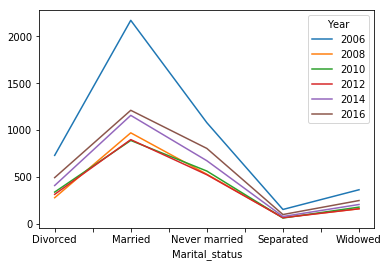

In [169]:
x= list(df_marital_status)
print(x)

df_marital_status.plot()
plt.show()


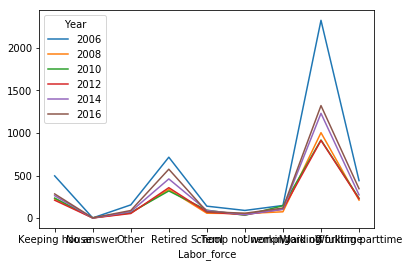

In [170]:
df_labor_force.plot()
plt.show()

In [176]:
# Select the columns you want to analyze
df_combine= GSS_df.filter(['Marital status','Total family income',
                         'General happiness'
                           ],axis=1)
df_combine.head()

,Marital status,Total family income,General happiness
0,Never married,$25000 or more,Pretty happy
1,Never married,$25000 or more,Very happy
2,Divorced,Refused,Pretty happy
3,Never married,$25000 or more,Very happy
4,Never married,Don't know,Pretty happy


In [177]:
#lets rename the columns
df_combine = df_combine.rename(columns={ 
                                            'Marital status' : 'Marital_status',
                                            'General happiness' :'General_happiness',
                                             'Total family income' :'Family_income'})


df_combine.head()

,Marital_status,Family_income,General_happiness
0,Never married,$25000 or more,Pretty happy
1,Never married,$25000 or more,Very happy
2,Divorced,Refused,Pretty happy
3,Never married,$25000 or more,Very happy
4,Never married,Don't know,Pretty happy


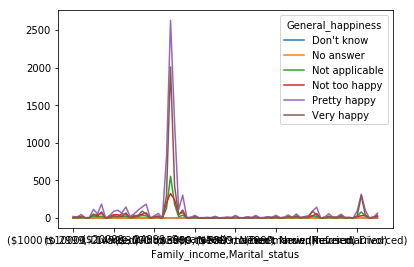

In [178]:
df_combine =df_combine.groupby(['Family_income','Marital_status','General_happiness'],as_index=False).size().unstack(fill_value=0)
df_combine.dtypes

df_combine.plot.line()
plt.show()
